In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

k = 8          # Number of information bits per message
M = 2**k       # Number of messages
n = 8          # Number of real channel uses per message
num_iter = 10000
batch_size_1 = 256
batch_size_2 = 512
batch_size_3 = 1024
LR = 0.001
# AUTOENCODER SYSTEM MODEL
batch_size = tf.placeholder(tf.int32,shape=[])
s = tf.random.uniform(shape=[batch_size],minval=0,maxval=M,dtype=tf.int32)
s_one_hot = tf.one_hot(s,depth=M)

# Transmitter
tx = tf.keras.layers.Dense(units=M,activation="relu")(s_one_hot)
tx = tf.keras.layers.Dense(units=n,activation=None)(tx)
x = tx / tf.sqrt(tf.reduce_mean(tf.square(tx)))

# Channel
noise_std = tf.placeholder(dtype=tf.float32,shape=[])
noise = tf.random.normal(shape=tf.shape(x),stddev=noise_std)
y = x + noise

# Receiver
rx = tf.keras.layers.Dense(units=M, activation="relu")(y)
s_hat = tf.keras.layers.Dense(units=M, activation=None)(rx)

# Loss function
cross_entropy = tf.losses.sparse_softmax_cross_entropy(labels=s,logits=s_hat)


# Metrics
correct_predictions = tf.equal(tf.argmax(tf.nn.softmax(s_hat),axis=1,output_type=tf.int32),s)
accuracy = tf.reduce_mean(tf.cast(correct_predictions,dtype=tf.float32))
bler = 1.0 - accuracy

# Optimizer
lr = tf.placeholder(dtype=tf.float32,shape=[])
ADAM_op    = tf.train.AdamOptimizer(learning_rate=lr).minimize(cross_entropy)
GD_op      = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cross_entropy)
RMSProp_op = tf.train.RMSPropOptimizer(learning_rate=lr).minimize(cross_entropy)
Adagrad_op= tf.train.AdagradOptimizer(learning_rate=lr).minimize(cross_entropy)

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [2]:
# disabling errors casued from tensorflow 2 so we can run our 1.x version 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#creating 9 sessions because we are training 3 batch_size x 3 different optimizers
sess1 = tf.Session()
sess2 = tf.Session()
sess3 = tf.Session()
sess4 = tf.Session()
sess5 = tf.Session()
sess6 = tf.Session()
sess7 = tf.Session()
sess8 = tf.Session()
sess9 = tf.Session()

sess1.run(tf.global_variables_initializer())
sess2.run(tf.global_variables_initializer())
sess3.run(tf.global_variables_initializer())
sess4.run(tf.global_variables_initializer())
sess5.run(tf.global_variables_initializer())
sess6.run(tf.global_variables_initializer())
sess7.run(tf.global_variables_initializer())
sess8.run(tf.global_variables_initializer())
sess9.run(tf.global_variables_initializer())


def EbNo2Sigma(ebnodb):
  '''Convert Eb/No in dB to noise standard deviation'''
  ebno = 10**(ebnodb/10)
  bits_per_complex_symbol = k/(n/2)
  return 1.0/np.sqrt(bits_per_complex_symbol*ebno)



In [3]:
# applying adam optimizer on different batch size and learning rates
#creating empty lists to store the loss values for plotting it later
loss1_ADAM=[]
loss2_ADAM=[]
loss3_ADAM=[]

for i in range(num_iter):
  _, loss_val = sess1.run([ADAM_op, cross_entropy],feed_dict={batch_size: batch_size_1, noise_std: EbNo2Sigma(7.0), lr: LR})
  loss1_ADAM.append(loss_val)
for i in range(num_iter):
  _, loss_val = sess2.run([ADAM_op, cross_entropy],feed_dict={batch_size: batch_size_2, noise_std: EbNo2Sigma(7.0), lr: LR})
  loss2_ADAM.append(loss_val)
for i in range(num_iter):
     _, loss_val = sess3.run([ADAM_op, cross_entropy],feed_dict={batch_size: batch_size_3, noise_std: EbNo2Sigma(7.0), lr: LR})
     loss3_ADAM.append(loss_val)


In [4]:
# applying Gradient Descent optimizer on different batch size and learning rates

#creating empty lists to store the loss values for plotting it later
loss1_GD=[]
loss2_GD=[]
loss3_GD=[]

for i in range(num_iter):
  _, loss_val = sess4.run([GD_op, cross_entropy],feed_dict={batch_size: batch_size_1, noise_std: EbNo2Sigma(7.0), lr: LR})
  loss1_GD.append(loss_val)
for i in range(num_iter):
  _, loss_val = sess5.run([GD_op, cross_entropy],feed_dict={batch_size: batch_size_2, noise_std: EbNo2Sigma(7.0), lr: LR})
  loss2_GD.append(loss_val)
for i in range(num_iter):
     _, loss_val = sess6.run([GD_op, cross_entropy],feed_dict={batch_size: batch_size_3, noise_std: EbNo2Sigma(7.0), lr: LR})
     loss3_GD.append(loss_val)


In [5]:
# applying RMSProp optimizer on different batch size and learning rates

#creating empty lists to store the loss values for plotting it later
loss1_RMSProp=[]
loss2_RMSProp=[]
loss3_RMSProp=[]

for i in range(num_iter):
  _, loss_val = sess7.run([RMSProp_op, cross_entropy],feed_dict={batch_size: batch_size_1, noise_std: EbNo2Sigma(7.0), lr: LR})
  loss1_RMSProp.append(loss_val)
for i in range(num_iter):
  _, loss_val = sess8.run([RMSProp_op, cross_entropy],feed_dict={batch_size: batch_size_2, noise_std: EbNo2Sigma(7.0), lr: LR})
  loss2_RMSProp.append(loss_val)
for i in range(num_iter):
     _, loss_val = sess9.run([RMSProp_op, cross_entropy],feed_dict={batch_size: batch_size_3, noise_std: EbNo2Sigma(7.0), lr: LR})
     loss3_RMSProp.append(loss_val)


In [6]:
import math
def calc_channel_capacity(B,SNR):
    a = (math.log((1+SNR),2))
    CC = B*a
    return CC

# Calculating Channel Capacity for 3100 Hz BW and 7.0dB SNR
channel_capacity = calc_channel_capacity(3.1,EbNo2Sigma(7.0))

In [7]:
print('channel capacity =    ' + str(channel_capacity))

channel capacity =    1.2275948066851239


In [8]:
#initializing 8PSK & QPSK modulations values to compare with autoencoder performance in different scenarios 
BLER_QPSK_k8n8 = np.array([4.818329E-01, 3.720104E-01, 2.645386E-01, 1.698987E-01, 9.636992E-02, 4.703772E-02,
                           1.914436E-02, 6.244719E-03, 1.551032E-03, 2.745986E-04, 3.194809E-05, 2.384186E-06,
                           0.000000E+00, 0.000000E+00, 0.000000E+00])
BLER_8PSK      = np.array([0.3478959, 0.2926128, 0.2378847, 0.1854187, 0.1372344, 0.0953536, 0.0614003, 0.0360195,
                           0.0185215, 0.0082433, 0.0030178, 0.0008626, 0.0001903, 0.0000289, 0.0000027, ])

# creating 9 monte_carlo_bler for the 9 different training settings 
snr_range = np.linspace(0,14,15)
monte_carlo_bler1 = np.zeros((len(snr_range),))
monte_carlo_bler2 = np.zeros((len(snr_range),))
monte_carlo_bler3 = np.zeros((len(snr_range),))
monte_carlo_bler4 = np.zeros((len(snr_range),))
monte_carlo_bler5 = np.zeros((len(snr_range),))
monte_carlo_bler6 = np.zeros((len(snr_range),))
monte_carlo_bler7 = np.zeros((len(snr_range),))
monte_carlo_bler8 = np.zeros((len(snr_range),))
monte_carlo_bler9 = np.zeros((len(snr_range),))

for i in range(len(snr_range)):
  for j in range(10):
    monte_carlo_bler1[i] += sess1.run(bler, feed_dict={batch_size: 10000, noise_std: EbNo2Sigma(snr_range[i]), lr: 0.0})
    monte_carlo_bler2[i] += sess2.run(bler, feed_dict={batch_size: 10000, noise_std: EbNo2Sigma(snr_range[i]), lr: 0.0})
    monte_carlo_bler3[i] += sess3.run(bler, feed_dict={batch_size: 10000, noise_std: EbNo2Sigma(snr_range[i]), lr: 0.0})
    monte_carlo_bler4[i] += sess4.run(bler, feed_dict={batch_size: 10000, noise_std: EbNo2Sigma(snr_range[i]), lr: 0.0})
    monte_carlo_bler5[i] += sess5.run(bler, feed_dict={batch_size: 10000, noise_std: EbNo2Sigma(snr_range[i]), lr: 0.0})
    monte_carlo_bler6[i] += sess6.run(bler, feed_dict={batch_size: 10000, noise_std: EbNo2Sigma(snr_range[i]), lr: 0.0})
    monte_carlo_bler7[i] += sess7.run(bler, feed_dict={batch_size: 10000, noise_std: EbNo2Sigma(snr_range[i]), lr: 0.0})
    monte_carlo_bler8[i] += sess8.run(bler, feed_dict={batch_size: 10000, noise_std: EbNo2Sigma(snr_range[i]), lr: 0.0})
    monte_carlo_bler9[i] += sess9.run(bler, feed_dict={batch_size: 10000, noise_std: EbNo2Sigma(snr_range[i]), lr: 0.0})

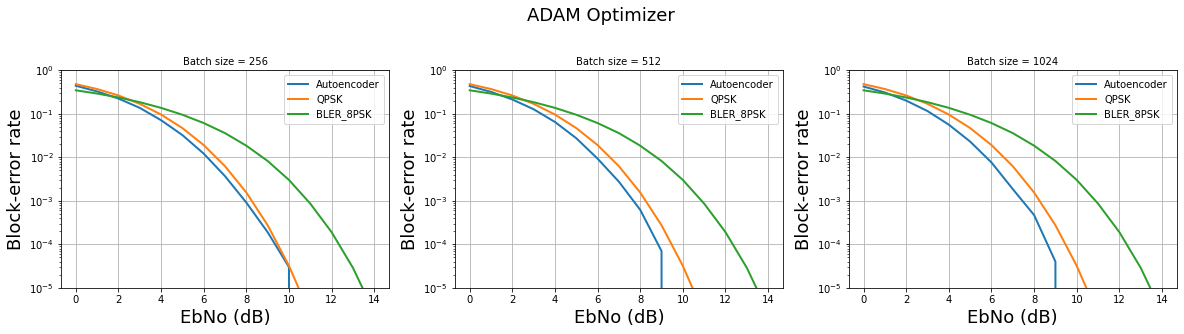

In [9]:
#plotting autoencoder vs BLER_QPSK_k8n8 vs BLER_8PSK for ADAM optimizer in different batch sizes
plt.figure(figsize=(20,4))
plt.suptitle('ADAM Optimizer', fontsize=18, y=1.1)

# subplot with batch size = 32
plt.subplot(1, 3, 1)
plt.plot(snr_range, monte_carlo_bler1/10, linewidth=2.0)
plt.plot(snr_range, BLER_QPSK_k8n8, linewidth=2.0)
plt.plot(snr_range, BLER_8PSK, linewidth=2.0)
plt.legend(['Autoencoder', 'QPSK','BLER_8PSK'], loc='upper right')
plt.yscale('log')
plt.grid(True)
plt.ylim([1e-5,1])
plt.xlabel('EbNo (dB)', fontsize=18)
plt.ylabel('Block-error rate', fontsize=18)
plt.title('Batch size = '+str(batch_size_1), fontsize=10)

# subplot with batch size = 128
plt.subplot(1, 3, 2)
plt.plot(snr_range, monte_carlo_bler2/10, linewidth=2.0)
plt.plot(snr_range, BLER_QPSK_k8n8, linewidth=2.0)
plt.plot(snr_range, BLER_8PSK, linewidth=2.0)
plt.legend(['Autoencoder', 'QPSK','BLER_8PSK'], loc='upper right')
plt.yscale('log')
plt.grid(True)
plt.ylim([1e-5,1])
plt.xlabel('EbNo (dB)', fontsize=18)
plt.ylabel('Block-error rate', fontsize=18)
plt.title('Batch size = '+str(batch_size_2), fontsize=10)

# subplot with batch size = 512
plt.subplot(1, 3, 3)
plt.plot(snr_range, monte_carlo_bler3/10, linewidth=2.0)
plt.plot(snr_range, BLER_QPSK_k8n8, linewidth=2.0)
plt.plot(snr_range, BLER_8PSK, linewidth=2.0)
plt.legend(['Autoencoder', 'QPSK','BLER_8PSK'], loc='upper right')
plt.yscale('log')
plt.grid(True)
plt.ylim([1e-5,1])
plt.xlabel('EbNo (dB)', fontsize=18)
plt.ylabel('Block-error rate', fontsize=18)
plt.title('Batch size = '+str(batch_size_3), fontsize=10)

plt.show()

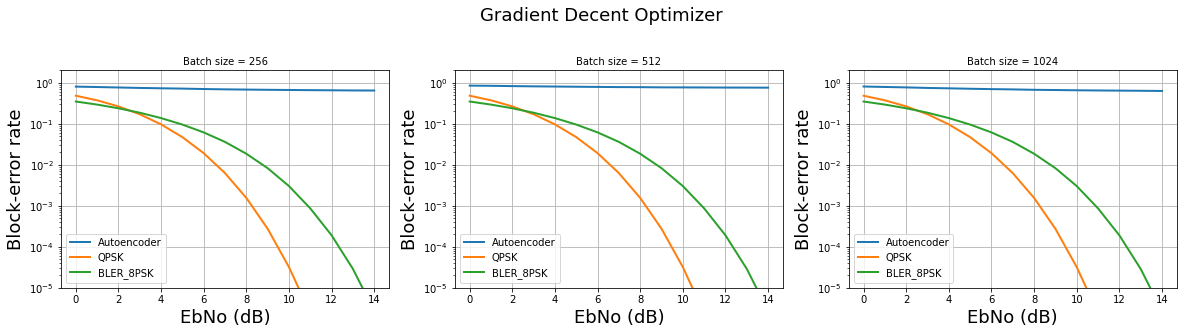

In [10]:
#plotting autoencoder vs BLER_QPSK_k8n8 vs BLER_8PSK for Gradient Decent optimizer in different batch sizes

plt.figure(figsize=(20,4))
plt.suptitle('Gradient Decent Optimizer', fontsize=18, y=1.1)

# subplot with batch size = 32
plt.subplot(1, 3, 1)
plt.plot(snr_range, monte_carlo_bler4/10, linewidth=2.0)
plt.plot(snr_range, BLER_QPSK_k8n8, linewidth=2.0)
plt.plot(snr_range, BLER_8PSK, linewidth=2.0)
plt.legend(['Autoencoder', 'QPSK','BLER_8PSK'], loc='lower left')
plt.yscale('log')
plt.grid(True)
plt.ylim([1e-5,2])
plt.xlabel('EbNo (dB)', fontsize=18)
plt.ylabel('Block-error rate', fontsize=18)
plt.title('Batch size = '+str(batch_size_1), fontsize=10)

# subplot with batch size = 128
plt.subplot(1, 3, 2)
plt.plot(snr_range, monte_carlo_bler5/10, linewidth=2.0)
plt.plot(snr_range, BLER_QPSK_k8n8, linewidth=2.0)
plt.plot(snr_range, BLER_8PSK, linewidth=2.0)
plt.legend(['Autoencoder', 'QPSK','BLER_8PSK'], loc='lower left')
plt.yscale('log')
plt.grid(True)
plt.ylim([1e-5,2])
plt.xlabel('EbNo (dB)', fontsize=18)
plt.ylabel('Block-error rate', fontsize=18)
plt.title('Batch size = '+str(batch_size_2), fontsize=10)

# subplot with batch size = 512
plt.subplot(1, 3, 3)
plt.plot(snr_range, monte_carlo_bler6/10, linewidth=2.0)
plt.plot(snr_range, BLER_QPSK_k8n8, linewidth=2.0)
plt.plot(snr_range, BLER_8PSK, linewidth=2.0)
plt.legend(['Autoencoder', 'QPSK','BLER_8PSK'], loc='lower left')
plt.yscale('log')
plt.grid(True)
plt.ylim([1e-5,2])
plt.xlabel('EbNo (dB)', fontsize=18)
plt.ylabel('Block-error rate', fontsize=18)
plt.title('Batch size = '+str(batch_size_3), fontsize=10)



plt.show()

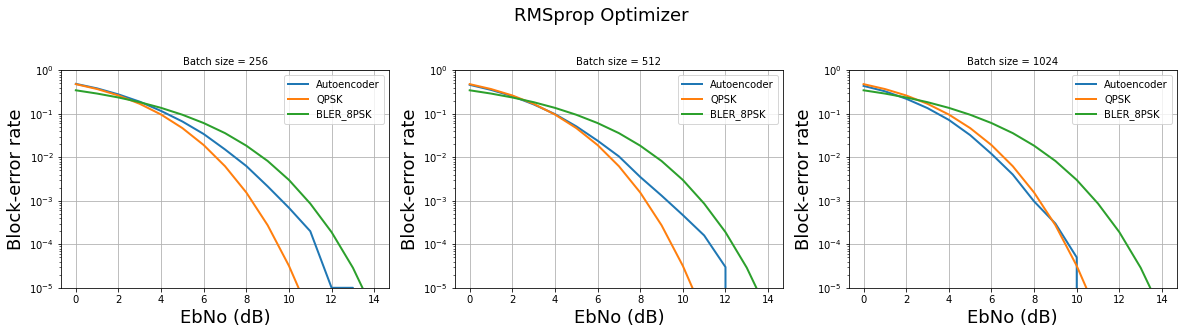

In [11]:
#plotting autoencoder vs BLER_QPSK_k8n8 vs BLER_8PSK for RMSprop optimizer in different batch sizes

plt.figure(figsize=(20,4))
plt.suptitle('RMSprop Optimizer', fontsize=18, y=1.1)

# subplot with batch size = 32
plt.subplot(1, 3, 1)
plt.plot(snr_range, monte_carlo_bler7/10, linewidth=2.0)
plt.plot(snr_range, BLER_QPSK_k8n8, linewidth=2.0)
plt.plot(snr_range, BLER_8PSK, linewidth=2.0)
plt.legend(['Autoencoder', 'QPSK','BLER_8PSK'], loc='upper right')
plt.yscale('log')
plt.grid(True)
plt.ylim([1e-5,1])
plt.xlabel('EbNo (dB)', fontsize=18)
plt.ylabel('Block-error rate', fontsize=18)
plt.title('Batch size = '+str(batch_size_1), fontsize=10)

# subplot with batch size = 128
plt.subplot(1, 3, 2)
plt.plot(snr_range, monte_carlo_bler8/10, linewidth=2.0)
plt.plot(snr_range, BLER_QPSK_k8n8, linewidth=2.0)
plt.plot(snr_range, BLER_8PSK, linewidth=2.0)
plt.legend(['Autoencoder', 'QPSK','BLER_8PSK'], loc='upper right')
plt.yscale('log')
plt.grid(True)
plt.ylim([1e-5,1])
plt.xlabel('EbNo (dB)', fontsize=18)
plt.ylabel('Block-error rate', fontsize=18)
plt.title('Batch size = '+str(batch_size_2), fontsize=10)

# subplot with batch size = 512
plt.subplot(1, 3, 3)
plt.plot(snr_range, monte_carlo_bler9/10, linewidth=2.0)
plt.plot(snr_range, BLER_QPSK_k8n8, linewidth=2.0)
plt.plot(snr_range, BLER_8PSK, linewidth=2.0)
plt.legend(['Autoencoder', 'QPSK','BLER_8PSK'], loc='upper right')
plt.yscale('log')
plt.grid(True)
plt.ylim([1e-5,1])
plt.xlabel('EbNo (dB)', fontsize=18)
plt.ylabel('Block-error rate', fontsize=18)
plt.title('Batch size = '+str(batch_size_3), fontsize=10)

plt.show()

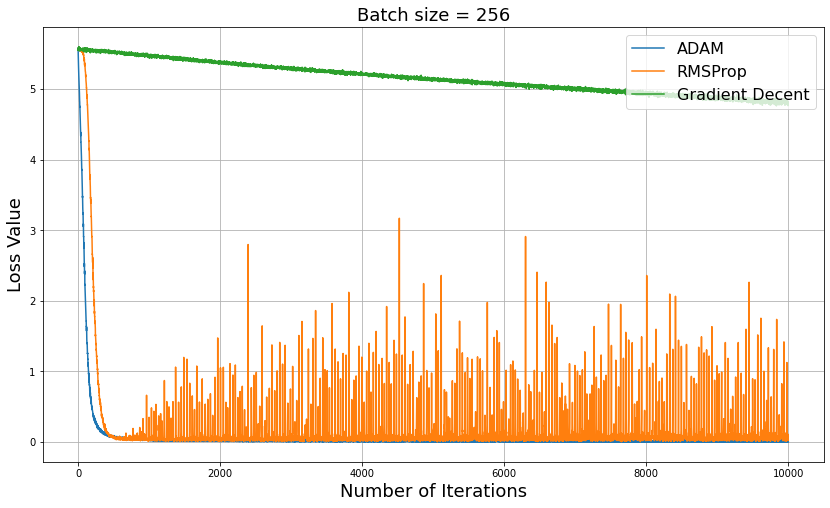

In [12]:
#comparing losses among different optimizers with similar batch size and learning rate 

plt.figure(figsize=(14,8))
plt.plot(range(len(loss1_ADAM)), loss1_ADAM)
plt.plot(range(len(loss1_RMSProp)), loss1_RMSProp)
plt.plot(range(len(loss1_GD)), loss1_GD)
plt.legend(['ADAM', 'RMSProp','Gradient Decent'], prop={'size': 16}, loc='upper right');
plt.xlabel('Number of Iterations', fontsize=18)
plt.ylabel('Loss Value', fontsize=18)
plt.title('Batch size = '+str(batch_size_1), fontsize=18)
plt.grid(True)
plt.show()

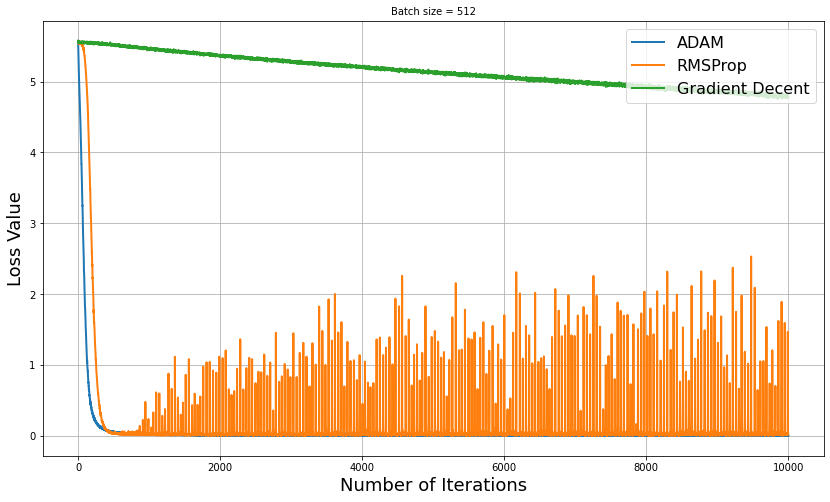

In [13]:
#comparing losses among different optimizers with similar batch size and learning rate 

plt.figure(figsize=(14,8))
plt.plot(range(len(loss2_ADAM)), loss2_ADAM, linewidth=2.0)
plt.plot(range(len(loss2_RMSProp)), loss2_RMSProp, linewidth=2.0)
plt.plot(range(len(loss2_GD)), loss2_GD, linewidth=2.0)
plt.legend(['ADAM', 'RMSProp','Gradient Decent'], prop={'size': 16}, loc='upper right');
plt.xlabel('Number of Iterations', fontsize=18)
plt.ylabel('Loss Value', fontsize=18)
plt.title('Batch size = '+str(batch_size_2), fontsize=10)
plt.grid(True)
plt.show()

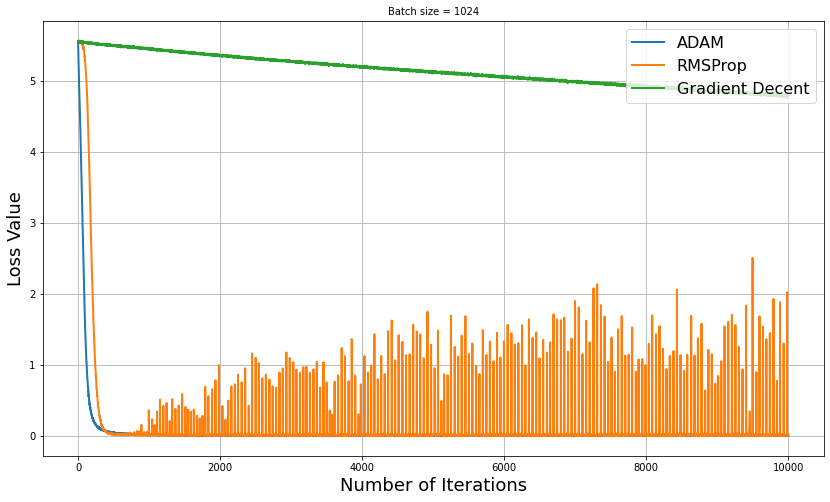

In [14]:
#comparing losses among different optimizers with similar batch size and learning rate 

plt.figure(figsize=(14,8))
plt.plot(range(len(loss3_ADAM)), loss3_ADAM, linewidth=2.0)
plt.plot(range(len(loss3_RMSProp)), loss3_RMSProp, linewidth=2.0)
plt.plot(range(len(loss3_GD)), loss3_GD, linewidth=2.0)
plt.legend(['ADAM', 'RMSProp','Gradient Decent'], prop={'size': 16}, loc='upper right');
plt.xlabel('Number of Iterations', fontsize=18)
plt.ylabel('Loss Value', fontsize=18)
plt.title('Batch size = '+str(batch_size_3), fontsize=10)
plt.grid(True)
plt.show()